In [17]:
import pandas as pd 

df = pd.read_csv("zomato_reviews.csv", encoding = "ISO-8859-1")
df.head()

,Unnamed: 0,rating,review
0,0,5,nice
1,1,5,"best biryani , so supportive staff of outlet ,..."
2,2,4,delivery boy was very decent and supportive.ð...
3,3,1,"worst biryani i have tasted in my life, half o..."
4,4,5,all food is good and tasty . will order again ...


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove stop words and single character words
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['cleaned_reviews'] = df['review'].apply(preprocess_text)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
def analyze_sentiment(text):
    if pd.isna(text) or text == "":
        return 'Neutral'
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_reviews'].apply(analyze_sentiment)

In [22]:
sentiment_counts = df['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
sentiment
Positive    2474
Neutral     1609
Negative    1396
Name: count, dtype: int64


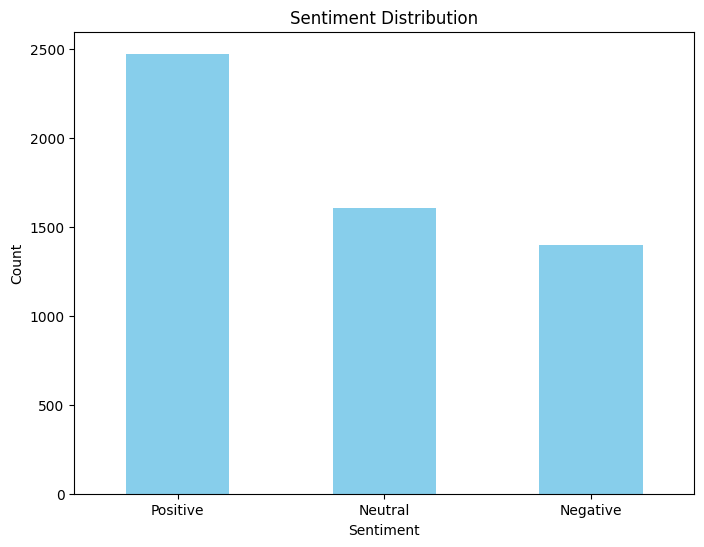

In [23]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
data= df['cleaned_reviews']

In [32]:
def preprocess(text):
    text = text.lower()
    words = word_tokenize(text)
    return words


#applying the function to the dataset
data = data.apply(preprocess)
data

0                                                  [nice]
1       [best, biryani, supportive, staff, outlet, per...
2                                 [delivery, boy, decent]
3       [worst, biryani, tasted, life, half, biryani, ...
4       [food, good, tasty, order, lot, explore, bawar...
                              ...                        
5474                                           [complain]
5475    [took, 1, hour, assign, valvet, thn, prepare, ...
5476    [took, hour, prepare, 3, khawsa, real, life, g...
5477           [late, littrally, time, pas, item, proper]
5478    [taste, stale, give, 5, piece, 50, r, please, ...
Name: cleaned_reviews, Length: 5479, dtype: object

In [33]:
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['money', 'place', 'great', 'horrible', 'food', 'time', 'waste', 'cake', 'make', 'order']
Topic: 1
Words: ['chicken', 'tha', 'biryani', 'poor', 'rice', 'hai', 'town', 'nahi', 'salad', 'friend']
Topic: 2
Words: ['order', 'bad', 'delivery', 'zomato', 'sandwich', 'please', 'even', 'restaurant', 'item', 'packing']
Topic: 3
Words: ['pizza', 'cold', 'cheese', 'one', 'bread', 'veg', 'late', 'surat', 'momos', 'oil']
Topic: 4
Words: ['good', 'food', 'taste', 'quality', 'nice', 'worst', 'like', 'quantity', 'best', 'service']


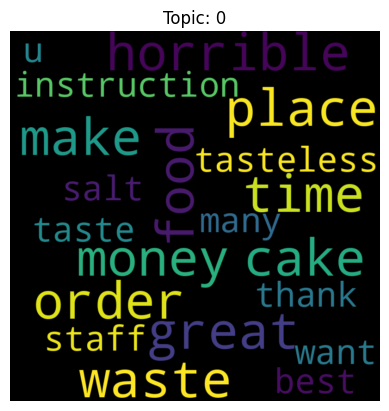

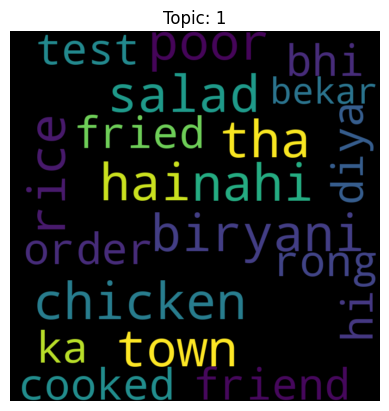

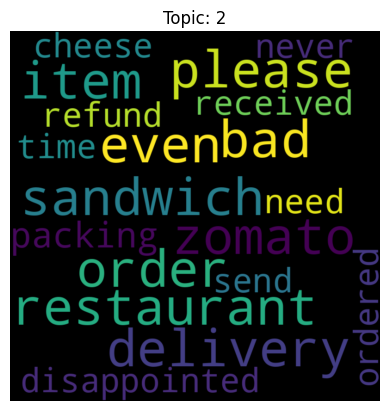

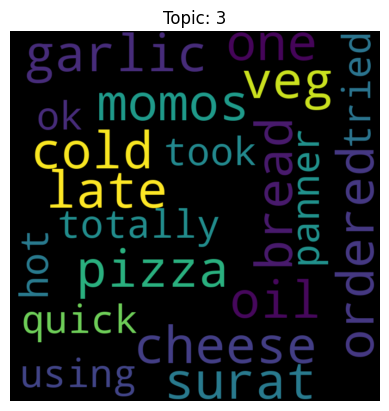

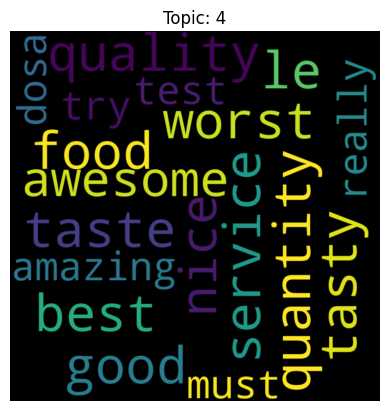

In [34]:
for topic_id, topic in enumerate(ldamodel.print_topics(num_topics=num_topics, num_words=20)):
    topic_words = " ".join([word.split("*")[1].strip() for word in topic[1].split(" + ")])
    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic: {}".format(topic_id))
    plt.show()